### 중심차분

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def numerical_diff(f,x) :
    h = 1e-4
    return (f(x+h) - f(x -h)) / (2*h)

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [4]:
x = np.arange(0, 20., 0.1 )

In [5]:
y = function_1(x)

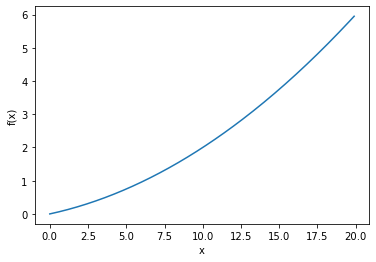

In [6]:
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y);

In [7]:
numerical_diff(function_1, 5)

0.1999999999990898

In [8]:
numerical_diff(function_1, 10)

0.2999999999986347

### 편미분

In [9]:
def function_2(x) :
    return x[0] ** 2 + x[1] ** 2

In [10]:
# x[0] = 3, x[1] = 4 일 떄 x[0] 의 미분
def function_tmp1(x0) :
    return x0**2+4**2

In [11]:
numerical_diff(function_tmp1, 3)

6.00000000000378

In [12]:
def function_tmp2(x1) :
    return 3**2 + x1**2

In [13]:
numerical_diff(function_tmp2,4)

7.999999999999119

### 기울기

In [5]:
def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size) :
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fhx1 = f(x) #[3.0001, 4.0]
        
        x[idx] = tmp_val - h
        fhx2 = f(x) #[2.9999, 4.0]
        
        grad[idx] = (fhx1 - fhx2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [6]:
grad = np.zeros_like(np.array([3.,4.]))
print(grad)

[0. 0.]


In [16]:
numerical_gradient(function_2, np.array([3.,4.]))

array([6., 8.])

In [17]:
numerical_gradient(function_2, np.array([0.0,2.0]))

array([0., 4.])

In [18]:
numerical_gradient(function_2, np.array([0.0,0.0]))

array([0., 0.])

In [19]:
def gradient_descent(f, init_x, lr, step_num) : #lr ; learning rate, step_num ;몇번실행?
    x = init_x.copy()
    
    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad
    
    return x

In [20]:
init_x = np.array([-3.0, 4.0])

In [21]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [22]:
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [23]:
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

In [24]:
numerical_gradient(function_2, init_x)

array([-6.,  8.])

In [25]:
#적정한 lr을 주는게 가장중요! 너무크면 발산, 너무작으면 학습이 최적점까지 안감

In [11]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

In [12]:
def softmax(a) :
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a 
    
    return y

In [13]:
class simpleNet :
    def __init__(self) :
        self.W = np.random.randn(2,3)
        
    def predict(self, x) :
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        
        return loss

In [14]:
net = simpleNet()

In [15]:
net.W

array([[ 0.04355644,  1.04205661,  1.433367  ],
       [ 0.18114637, -1.61846235,  0.2716926 ]])

In [16]:
x = np.array([0.6,0.9])

In [17]:
p = net.predict(x)

In [18]:
p

array([ 0.1891656 , -0.83138215,  1.10454354])

In [19]:
np.argmax(p)

2

In [36]:
t =np.array([1,0,0])

In [37]:
net.loss(x, t)

1.3501787364831253

In [38]:
def f(_) :
    return net.loss(x,t)

In [39]:
def numerical_gradient(f, x) :
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx, _ in np.ndenumerate(x) :
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fhx1 = f(x) #[3.0001, 4.0]
        
        x[idx] = tmp_val - h
        fhx2 = f(x) #[2.9999, 4.0]
        
        grad[idx] = (fhx1 - fhx2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [40]:
numerical_gradient(f, net.W) #f 가 CEE // net.W에서의 기울기가 아래값

array([[-0.44448353,  0.05604766,  0.38843587],
       [-0.6667253 ,  0.08407149,  0.58265381]])

In [41]:
print(f(x))

1.3501787364831253
